<a href="https://colab.research.google.com/github/hansuho113/Machine_learning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_11%EC%A3%BC%EC%B0%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784')
mnist.data = mnist.data / 255.0
X_train = mnist.data[:60000]
X_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])

In [2]:
%matplotlib inline

random_pick = np.random.randint(low=0, high=10000, size=10)
random_pick

array([4134, 6731, 4977, 8926, 5928, 3854,  903, 7745, 7103, 5003])

[9 7 1 7 6 7 6 8 3 8]


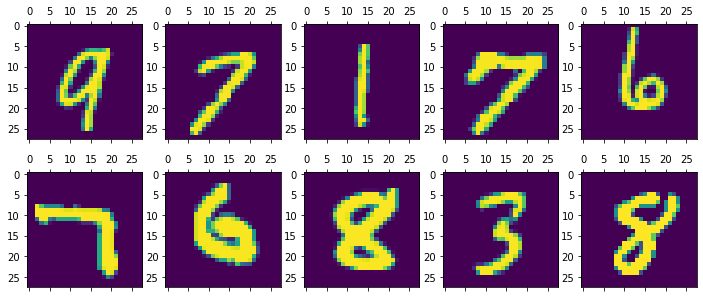

In [3]:
figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
    tmp = mnist.data[60000 + random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)

print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(100),
                    learning_rate_init=0.001,
                    batch_size=512,
                    max_iter=300,
                    solver='adam',
                    verbose=True)
mlp.fit(X_train, y_train)

res = mlp.predict(X_test)

conf = np.zeros((10, 10))

for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)

no_correct = 0
for i in range(10):
    no_correct += conf[i][i]
acc = no_correct / len(res)

print(f"테스트 집합에 대한 정확률: {acc*100}%")

Iteration 1, loss = 0.63768496
Iteration 2, loss = 0.27397350
Iteration 3, loss = 0.21375262
Iteration 4, loss = 0.17689124
Iteration 5, loss = 0.15151869
Iteration 6, loss = 0.13239000
Iteration 7, loss = 0.11725266
Iteration 8, loss = 0.10465473
Iteration 9, loss = 0.09475353
Iteration 10, loss = 0.08655738
Iteration 11, loss = 0.07937363
Iteration 12, loss = 0.07281912
Iteration 13, loss = 0.06761102
Iteration 14, loss = 0.06233964
Iteration 15, loss = 0.05773280
Iteration 16, loss = 0.05411587
Iteration 17, loss = 0.04982439
Iteration 18, loss = 0.04642354
Iteration 19, loss = 0.04324824
Iteration 20, loss = 0.03992642
Iteration 21, loss = 0.03782477
Iteration 22, loss = 0.03490392
Iteration 23, loss = 0.03245607
Iteration 24, loss = 0.03048404
Iteration 25, loss = 0.02813455
Iteration 26, loss = 0.02715742
Iteration 27, loss = 0.02467113
Iteration 28, loss = 0.02329024
Iteration 29, loss = 0.02188459
Iteration 30, loss = 0.02004004
Iteration 31, loss = 0.01890128
Iteration 32, los

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
import time

digit = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

s = time.time()
mlp = MLPClassifier(learning_rate_init=0.001,
                    batch_size=32,
                    max_iter=300,
                    solver='sgd')

prange = range(50, 1001, 50)

train_score, tset_score = validation_curve(mlp, X_train, y_train,
                                           param_name='hidden_layer_sizes',
                                           param_range=prange,
                                           cv=10,
                                           scoring='accuracy',
                                           n_jobs=4)
e = time.time()


NameError: ignored

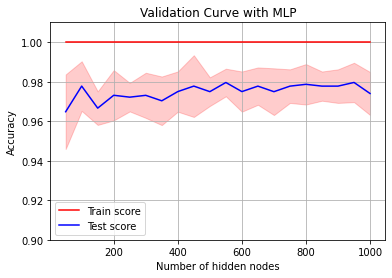

584.5968902111053


In [14]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(tset_score, axis=1)
test_std = np.std(tset_score, axis=1)

plt.plot(prange, train_mean, label='Train score', color='r')
plt.plot(prange, test_mean, label='Test score', color='b')
plt.fill_between(prange, train_mean-train_std, train_mean+train_std, alpha=0.2, color='r')
plt.fill_between(prange, test_mean-test_std, test_mean+test_std, alpha=0.2, color='r')
plt.legend(loc='best')
plt.title("Validation Curve with MLP")
plt.xlabel('Number of hidden nodes')
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

print(e-s)

In [16]:
best_number_nodes = prange[np.argmax(test_mean)]
print(f"최적의 은닉층 노드 개수는 {best_number_nodes} 개입니다.")

mlp = MLPClassifier(hidden_layer_sizes=(best_number_nodes),
                    learning_rate_init=0.001,
                    batch_size=512,
                    max_iter=300,
                    solver='adam',
                    verbose=True)
mlp.fit(X_train, y_train)

res = mlp.predict(X_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)

no_correct = 0
for i in range(10):
    no_correct += conf[i][i]
acc = no_correct / len(res)

print(f"테스트 집합의 정확률은: {acc*100} %")

최적의 은닉층 노드 개수는 950 개입니다.
Iteration 1, loss = 3.84611569
Iteration 2, loss = 1.68009334
Iteration 3, loss = 0.59994526
Iteration 4, loss = 0.46396897
Iteration 5, loss = 0.24844848
Iteration 6, loss = 0.20826798
Iteration 7, loss = 0.16516009
Iteration 8, loss = 0.13090231
Iteration 9, loss = 0.11300416
Iteration 10, loss = 0.11569549
Iteration 11, loss = 0.09113214
Iteration 12, loss = 0.07799572
Iteration 13, loss = 0.07038498
Iteration 14, loss = 0.05849119
Iteration 15, loss = 0.05776092
Iteration 16, loss = 0.04745237
Iteration 17, loss = 0.04662515
Iteration 18, loss = 0.05029488
Iteration 19, loss = 0.03908616
Iteration 20, loss = 0.03512042
Iteration 21, loss = 0.03075815
Iteration 22, loss = 0.02753643
Iteration 23, loss = 0.02733318
Iteration 24, loss = 0.02407618
Iteration 25, loss = 0.02276314
Iteration 26, loss = 0.02147697
Iteration 27, loss = 0.02066200
Iteration 28, loss = 0.01942444
Iteration 29, loss = 0.01841658
Iteration 30, loss = 0.01738080
Iteration 31, loss = 0.0